# DATA_620: Assignment: Week_3 (Part2)
    

Data Source : Davis Southern Club Women

The data were collected from the following address: 
https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html

These data represent the attendance of 18 Southern women at 14 Social events. We have to infer about the relationships between (1) the women and (2) the social events. 
            

Setup data and Creating Graph:

To do our research with the data at first, we have imported some libraries. 
We imported networkx, networkx's bipartite, matplotlib's pyplot for graphing, and Numpy's for mathematical calculations and figures. Networkx has a preset generator for the Davis Southern Women dataset with the function networkx.davis_southern_women_graph() which was used here. 

In [33]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import numpy as np

In [34]:
G = nx.davis_southern_women_graph()
women = G.graph['top']
events = G.graph['bottom']
for node in women:
    G.node[node]["category"] = "woman"
for node in events:
    G.node[node]["category"] = "event"
color_map = {
    "event": "skyblue",
    "woman": "pink"
}

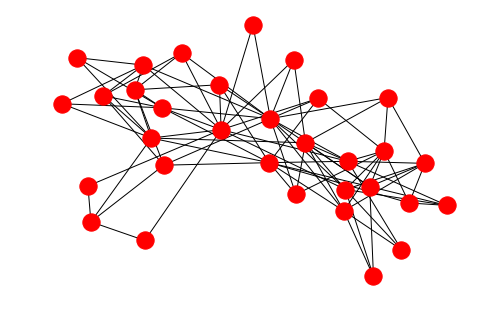

In [35]:
#Creating graph using the source data coding. 
nx.draw(G)
plt.show()

In [36]:
#Information about nodes, edges, and degree of the data
print(nx.info(G))


Name: 
Type: Graph
Number of nodes: 32
Number of edges: 89
Average degree:   5.5625


Creating new graph: For graphical presentation, a new graph was created using the data to rename each of the labels so that 
the women would have a newline instead of a space between their first name and last name.     

In [37]:
label_map = {}
for event in events:
    label_map[event] = event
for woman in women:
    women[women.index(woman)] = woman.replace(" ", "\n")
    label_map[woman] = woman.replace(" ", "\n")
G = nx.relabel_nodes(G, label_map)

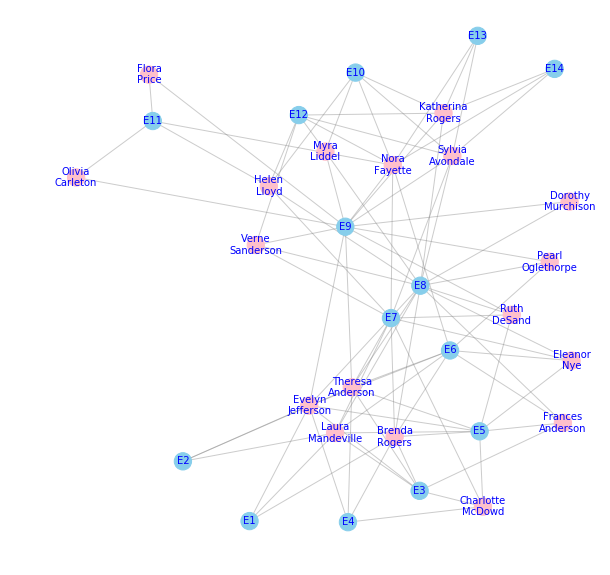

In [38]:
# Now, I am drawing the plot, with its nodes and edges.
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G,k=0.55,iterations=80)
pos_labels = {}
keys = pos.keys()
for key in keys:
    x, y = pos[key]
    pos_labels[key] = (x, y)
nx.draw_networkx_labels(G, pos_labels, font_color='Blue', font_size=10)
nx.draw_networkx_edges(G, pos, edge_color="Gray", alpha=0.4)
nx.draw_networkx_nodes(G, pos, node_color=[color_map[G.node[node]['category']] for node in G], node_size=300)
plt.axis("off")
plt.show()

The fourteen events and the eighteen women have various connections. 
It is clear from the figure that the six, eighth, and ninth events had the most participants, 
and that Evelynn Jefferson, Theresa Anderson, and Nora Fayette attended the most events.

Infer about the women:
There were eighteen women examined in the data. I have created graph to see who have more friends than other. 

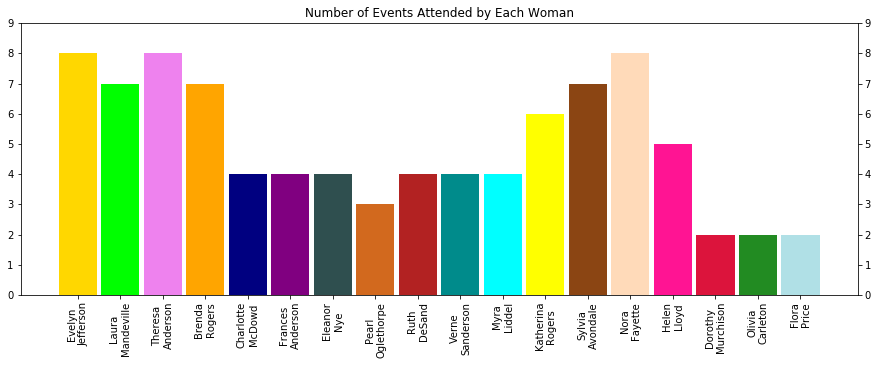

In [39]:
women_colors = {}
for woman in women:
    women_colors[woman] = ["gold", "lime", "violet", "orange", "navy", "purple",
                          "darkslategrey", "chocolate", "firebrick", "darkcyan", "cyan", "yellow",
                          "saddlebrown", "peachpuff", "deeppink", "crimson", "forestgreen", "powderblue"][women.index(woman)]
women_events = {}
for woman in women:
    women_events[woman] = len(list(nx.all_neighbors(G, woman)))
plt.figure(figsize=(15,5))
plt.bar(women_events.keys(), women_events.values(), width=0.9, align="center", color=[women_colors[woman] for woman in women])
plt.xticks(rotation=90)
plt.yticks(list(range(0,10)))
plt.tick_params(labelright=True, right=True)
plt.title("Number of Events Attended by Each Woman")
plt.show()

From the above graph we can see that the number of events attended by each woman varied greatly. As we can 
assume that fewer events attended correlates with a fewer number of friendships. Therefore, Dorothy, Olivia,
and Flora have the fewest number of friendships (each attended 2 events only) where Evelyn, Theresa, and Nora have the most (each attended 8 events).

Infer about women and their friendship: To find out the relationship of women with eatch other, I have created the following graph.

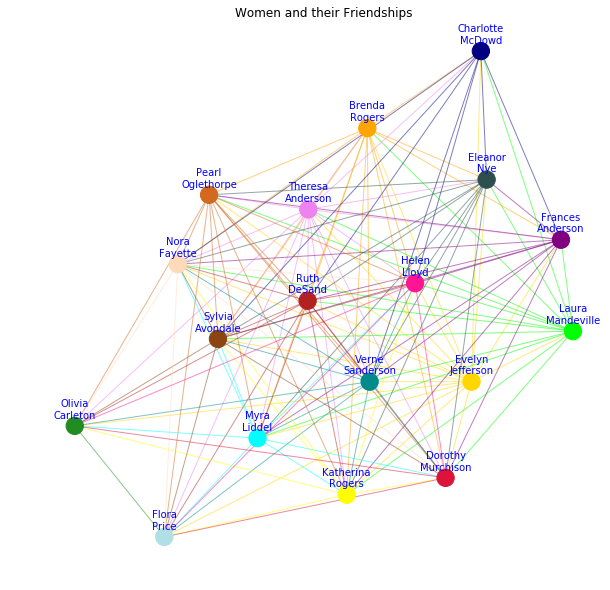

In [40]:
W = bipartite.projected_graph(G, women)
plt.figure(figsize=(10,10))
pos = nx.spring_layout(W,k=0.55,iterations=80)
pos_labels = {}
keys = pos.keys()
for key in keys:
    x, y = pos[key]
    pos_labels[key] = (x, y+0.065)
nx.draw_networkx_labels(W, pos_labels, font_color='Blue', font_size=10)
nx.draw_networkx_edges(W, pos, edge_color=[women_colors[edge[0]] for edge in list(W.edges())], alpha=0.5)
nx.draw_networkx_nodes(W, pos, node_color=[women_colors[node] for node in W], node_size=300)
plt.axis("off")
plt.title("Women and their Friendships")
plt.show()

From the above graph, we find the connections between all the women presented by a bipartite graph. 
These are women who attended events together. Looking over the graph, it is easily observable that Laura Mandeville 
and Myra Liddel are friends with many of the other women listed.

Now, I will create graph to find out an example of a frindship of an individual woman with other. 

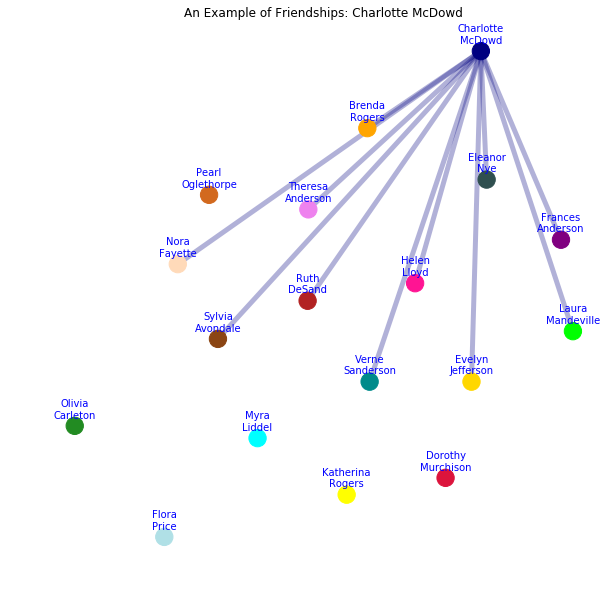

In [42]:
plt.figure(figsize=(10,10))
nx.draw_networkx_labels(W, pos_labels, font_color='Blue', font_size=10)
nx.draw_networkx_edges(W, pos, edgelist=[edge if "Charlotte\nMcDowd" in edge else ("Charlotte\nMcDowd", "Charlotte\nMcDowd") for edge in list(W.edges())], edge_color=women_colors["Charlotte\nMcDowd"], alpha=0.3, width=5)
nx.draw_networkx_nodes(W, pos, node_color=[women_colors[node] for node in W], node_size=300)
plt.axis("off")
plt.title("An Example of Friendships: Charlotte McDowd")
plt.show()

The above graph clearly shows a single individual's friendships with others. 
Charlotte McDowd is friends with eleven other women in the group.

Now, I will create a graph to show the highest number of friendships each woman has in the group. 

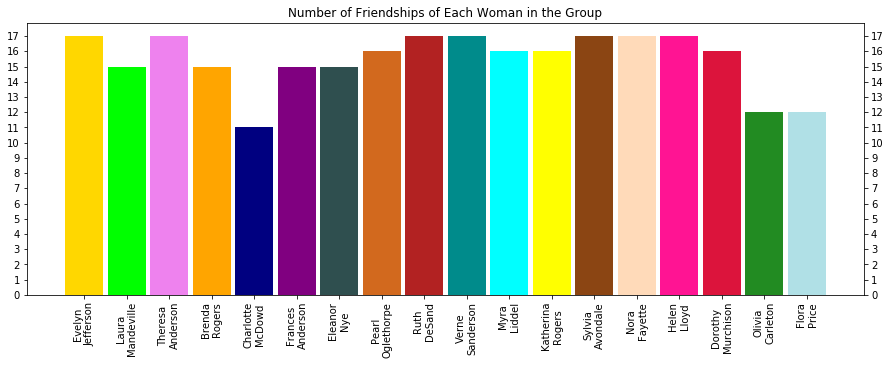

In [43]:
plt.figure(figsize=(15,5))
friends = {}
for woman in women:
    friends[woman] = W.degree(woman)
plt.bar(friends.keys(), friends.values(), width=0.9, align="center", color=[women_colors[node] for node in W])
plt.xticks(rotation=90)
plt.yticks(list(range(0,18)))
plt.tick_params(labelright=True, right=True)
plt.title("Number of Friendships of Each Woman in the Group")
plt.show()

Note that, an individual women can have at most 17 friendships. The women with the most friends are Evelyn Jefferson, Theresa Anderson, Ruth DeSand, Verne Sanderson, Sylvia Avondale, Nora Fayette, and Helen Lloyd (17 friends each); the women with the least friends are Charlotte McDowd (11 friends), Olivia Carleton (12 friend), and Flora Price (12 friend). This result conclude that, the number of events attended does not have a one-to-one relationship with the number of friends a woman has.

Now, I will find out the relationship between number of events a woman attended and the number of friendships she had. 

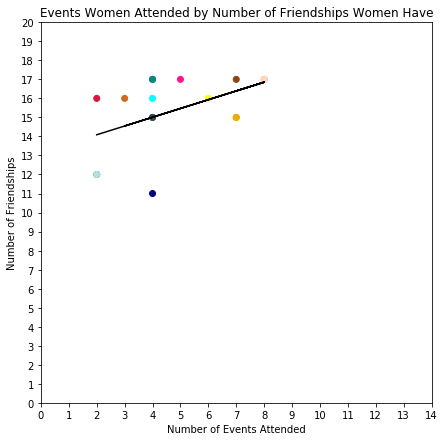

In [45]:
slope, intercept = np.polyfit(list(women_events.values()), list(friends.values()), 1)
abline_values = [slope * i + intercept for i in women_events.values()]
plt.figure(figsize=(7,7))
plt.scatter(women_events.values(), friends.values(), c=[women_colors[woman] for woman in women])
plt.plot(women_events.values(), abline_values, 'k')
plt.yticks(list(range(0,21)))
plt.xticks(list(range(0,15)))
plt.title("Events Women Attended by Number of Friendships Women Have")
plt.xlabel("Number of Events Attended")
plt.ylabel("Number of Friendships")
plt.show()

We discovered that there was a positive correlation between the number of events a woman attended and the number of friendships she had.

Learning about the events:
There were fourteen events in the data, E1 through E14, that the women in this data set attended.

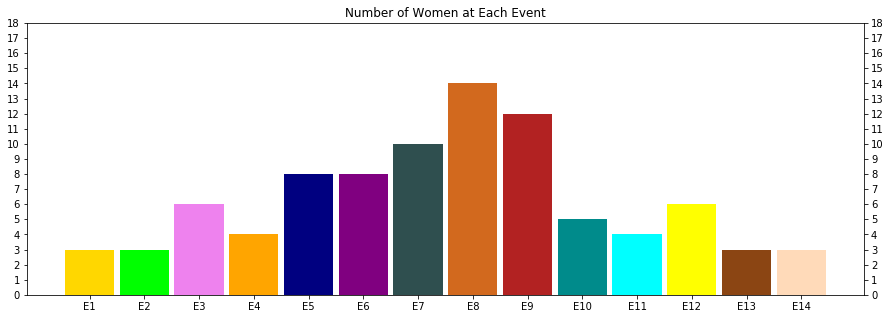

In [46]:
event_colors = {}
for event in events:
    event_colors[event] = ["gold", "lime", "violet", "orange", "navy", "purple",
                          "darkslategrey", "chocolate", "firebrick", "darkcyan", "cyan", "yellow",
                          "saddlebrown", "peachpuff", "deeppink", "crimson", "forestgreen", "powderblue"][events.index(event)]
event_attendees = {}
for event in events:
    event_attendees[event] = len(list(nx.all_neighbors(G, event)))
plt.figure(figsize=(15,5))
plt.bar(event_attendees.keys(), event_attendees.values(), width=0.9, align="center", color=[event_colors[event] for event in events])
plt.yticks(list(range(0,19)))
plt.tick_params(labelright=True, right=True)
plt.title("Number of Women at Each Event")
plt.show()

From the above graph, we can say that the events have a mostly normal distribution in terms of the number of women who attended each event. The average number of attendees at each event was about six women, with the majority of women participating in the middle of the nine months, assuming these events were evenly spaced, from events E5 through E9.

Now, I will find out the events which are similar to other. 

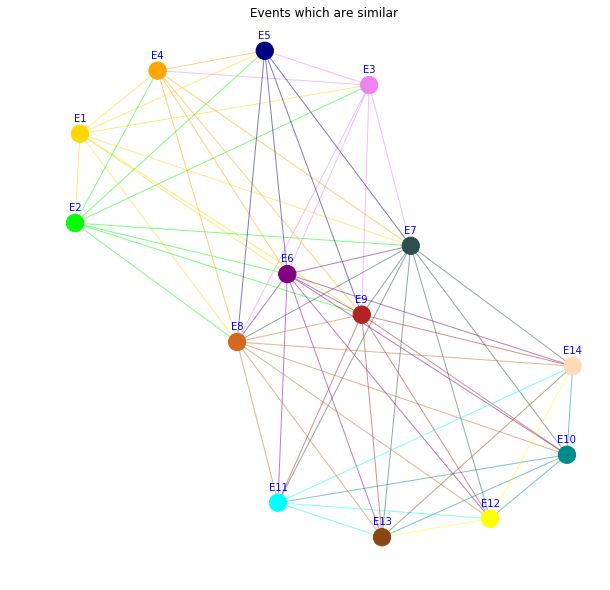

In [47]:
E = bipartite.projected_graph(G, events)
plt.figure(figsize=(10,10))
pos = nx.spring_layout(E,k=0.55,iterations=80)
pos_labels = {}
keys = pos.keys()
for key in keys:
    x, y = pos[key]
    pos_labels[key] = (x, y+0.065)
nx.draw_networkx_labels(E, pos_labels, font_color='Blue', font_size=10)
nx.draw_networkx_edges(E, pos, edge_color=[event_colors[edge[0]] for edge in list(E.edges())], alpha=0.5)
nx.draw_networkx_nodes(E, pos, node_color=[event_colors[node] for node in E], node_size=300)
plt.axis("off")
plt.title("Events which are similar")
plt.show()

All fourteen events are displayed above in a bipartite graph. From all the events, we can say that the sixth event (E6) is the most similar to the rest of the events.
I have showed an example of a similar events below:

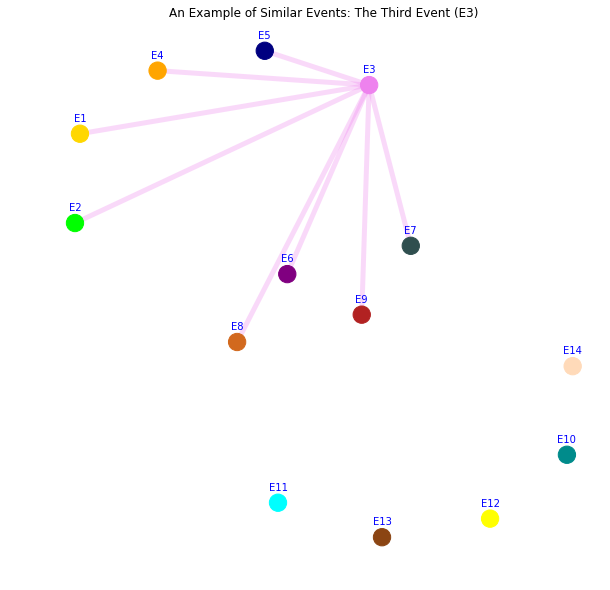

In [48]:
plt.figure(figsize=(10,10))
nx.draw_networkx_labels(E, pos_labels, font_color='Blue', font_size=10)
nx.draw_networkx_edges(E, pos, edgelist=[edge if "E3" in edge else ("E3", "E3") for edge in list(E.edges())], edge_color=event_colors["E3"], alpha=0.3, width=5)
nx.draw_networkx_nodes(E, pos, node_color=[event_colors[node] for node in E], node_size=300)
plt.axis("off")
plt.title("An Example of Similar Events: The Third Event (E3)")
plt.show()

From the above graph, we can see that the third event the club ran did not seem particular significant, with less or more lines, than any of the others. Also, like to mention that the example showed here was selected with random selection.

Now, I will show the sililar events to each other event in a bar graph. 

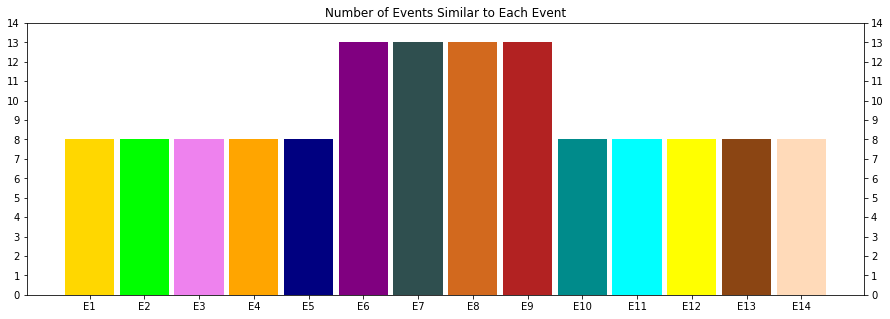

In [49]:
plt.figure(figsize=(15,5))
similar_events = {}
for event in events:
    similar_events[event] = E.degree(event)
plt.bar(similar_events.keys(), similar_events.values(), width=0.9, align="center", color=[event_colors[node] for node in E])
plt.yticks(list(range(0,15)))
plt.tick_params(labelright=True, right=True)
plt.title("Number of Events Similar to Each Event")
plt.show()

From the above bar graph, we can say that there were four events, events six through nine, that had the greatest number of events similar to them. These events also had some of the highest number of women attending them.
I have also showed the number of women at each event by number of events similar to each in a line graph below.

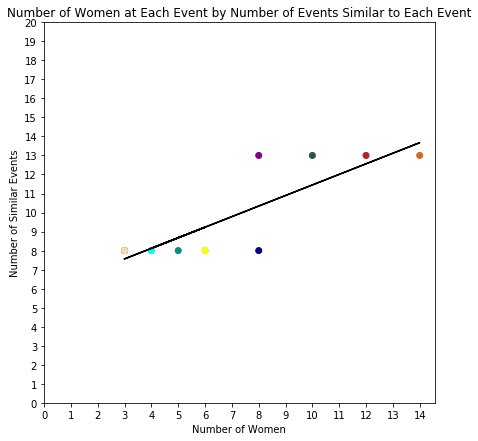

In [50]:
slope, intercept = np.polyfit(list(event_attendees.values()), list(similar_events.values()), 1)
abline_values = [slope * i + intercept for i in event_attendees.values()]
plt.figure(figsize=(7,7))
plt.scatter(event_attendees.values(), similar_events.values(), c=[event_colors[event] for event in events])
plt.plot(event_attendees.values(), abline_values, 'k')
plt.yticks(list(range(0,21)))
plt.xticks(list(range(0,15)))
plt.title("Number of Women at Each Event by Number of Events Similar to Each Event")
plt.xlabel("Number of Women")
plt.ylabel("Number of Similar Events")
plt.show()

From the above line graph, we can clearly see that there was a positive correlation between the number of women attending each event and the number of events similar to each of those same events.

Conclusion:
All the eighteen women were observed in terms of attending variety of events in nine months period. During this time, some women attended events more than others, and they also made friendships. The more events a woman participated in, the more likely she would get some connection with the other. Considering all the result, I like to conclude that the number of women at each event varied. In the beginning and at the end of the nine month observation period having less attendees than those towards the middle. The events were largely similar to one another. Approximately, one third of the events are similar to other. If more women attend to an event, the more likely the number of events similar to each of those same events will increase and there is a positive correlation between them. 